In [169]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.ndimage import shift
import tifffile as tf


(1003, 1162)
(1094, 1536)


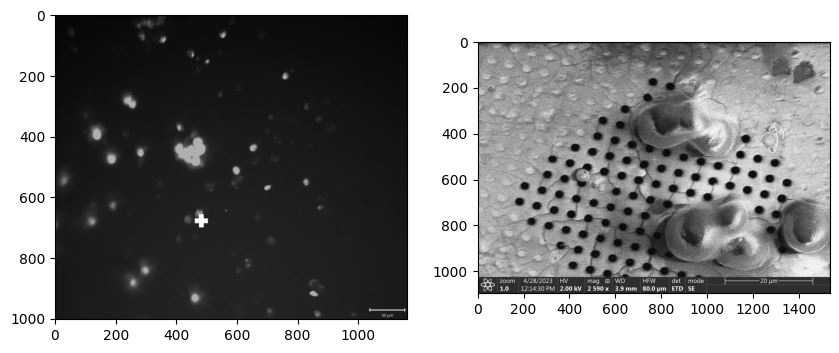

In [170]:
# Generate test images
image1 = pywt.data.camera()
image1 = tf.imread(r"C:\Users\Dadie1\Downloads\drive-download-20230504T015844Z-001\Ruby_scells280423\Rubyscellspiescope280423\screenshot_1.tiff").astype(np.float32)
image1 = image1[:, :, 0]
print(image1.shape)
# image1 = np.zeros((512, 512))
# image1[200:300, 200:300] = 1

image2 = tf.imread(r"C:\Users\Dadie1\Downloads\drive-download-20230504T015844Z-001\Ruby_scells280423\Rubyscellsfib280423\pairsbeforeeb_002.tif")
image2 = image2[:, :, 0]
print(image2.shape)# image2 = shift(image1, (100, 200))

# plot both on same figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image1, cmap='gray')
ax[1].imshow(image2, cmap='gray')
plt.show()

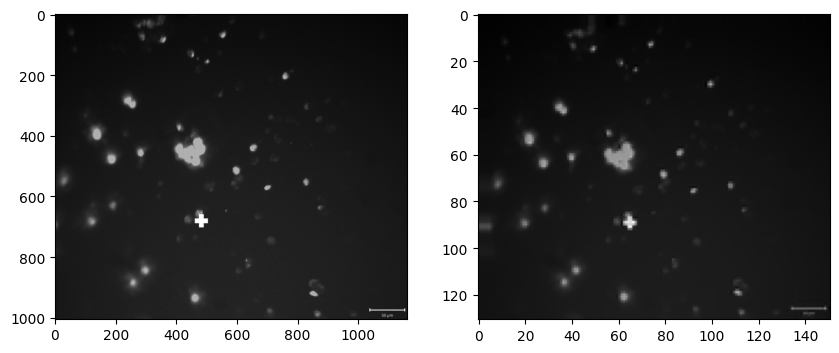

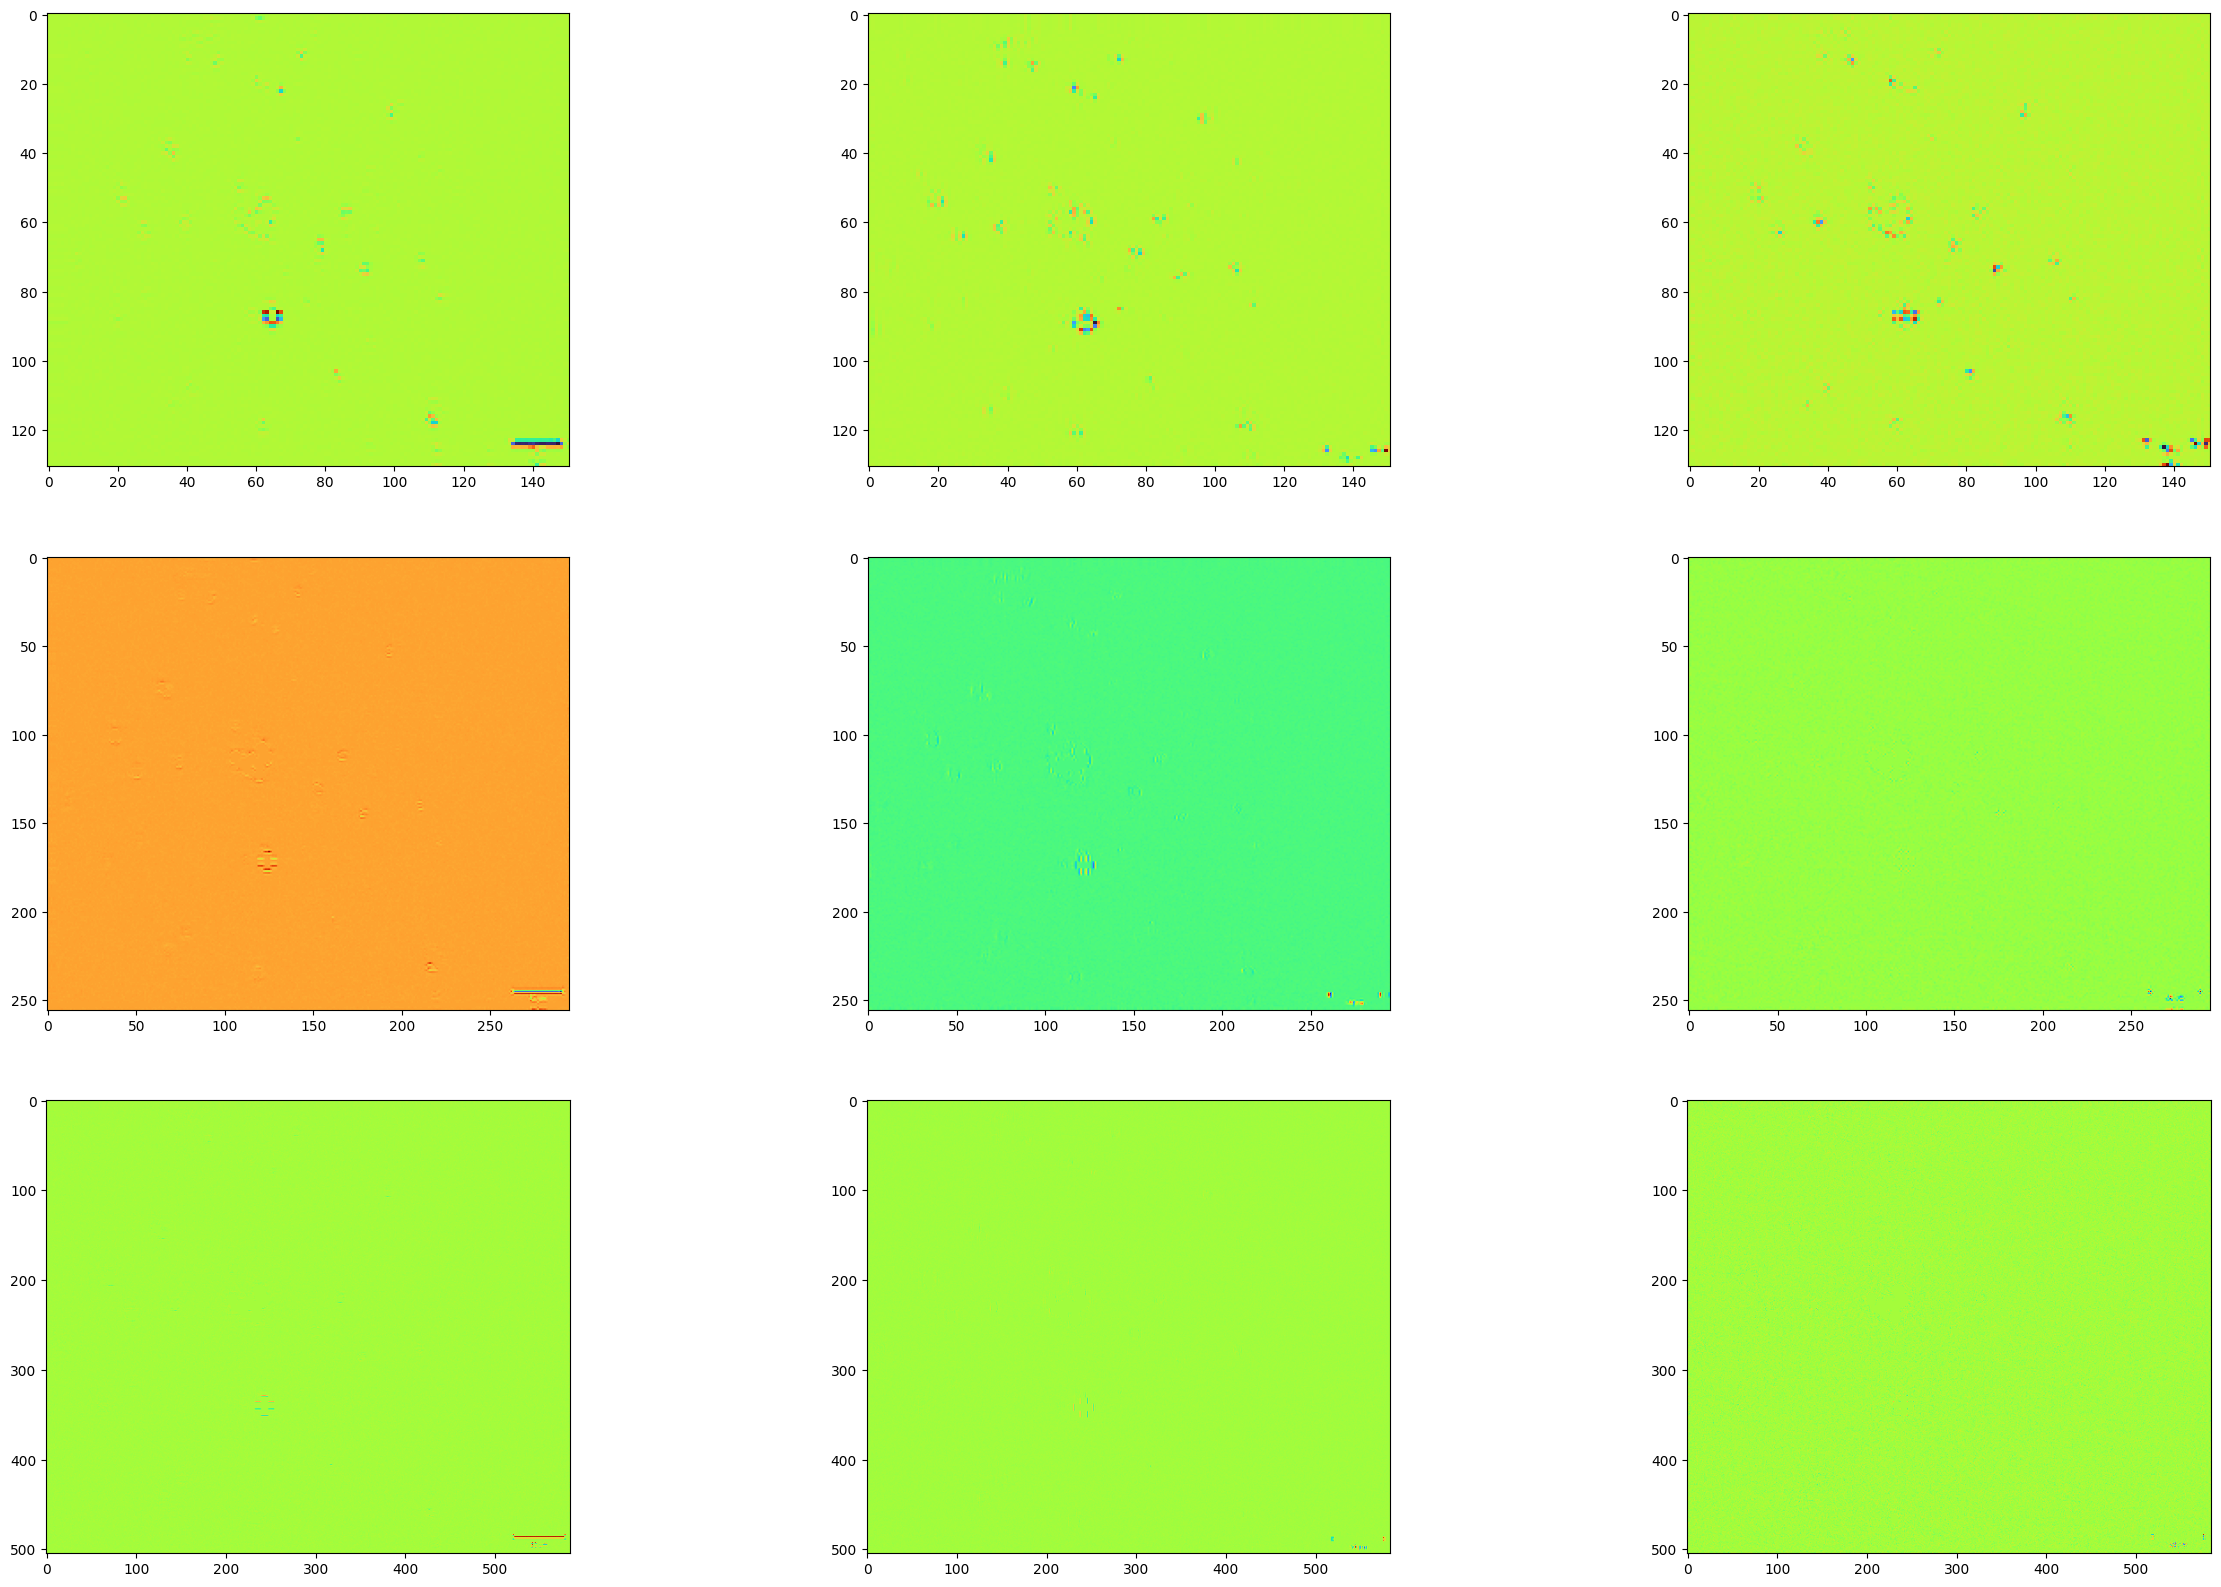

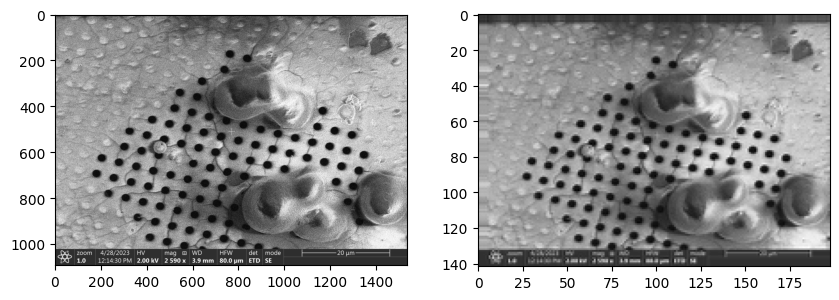

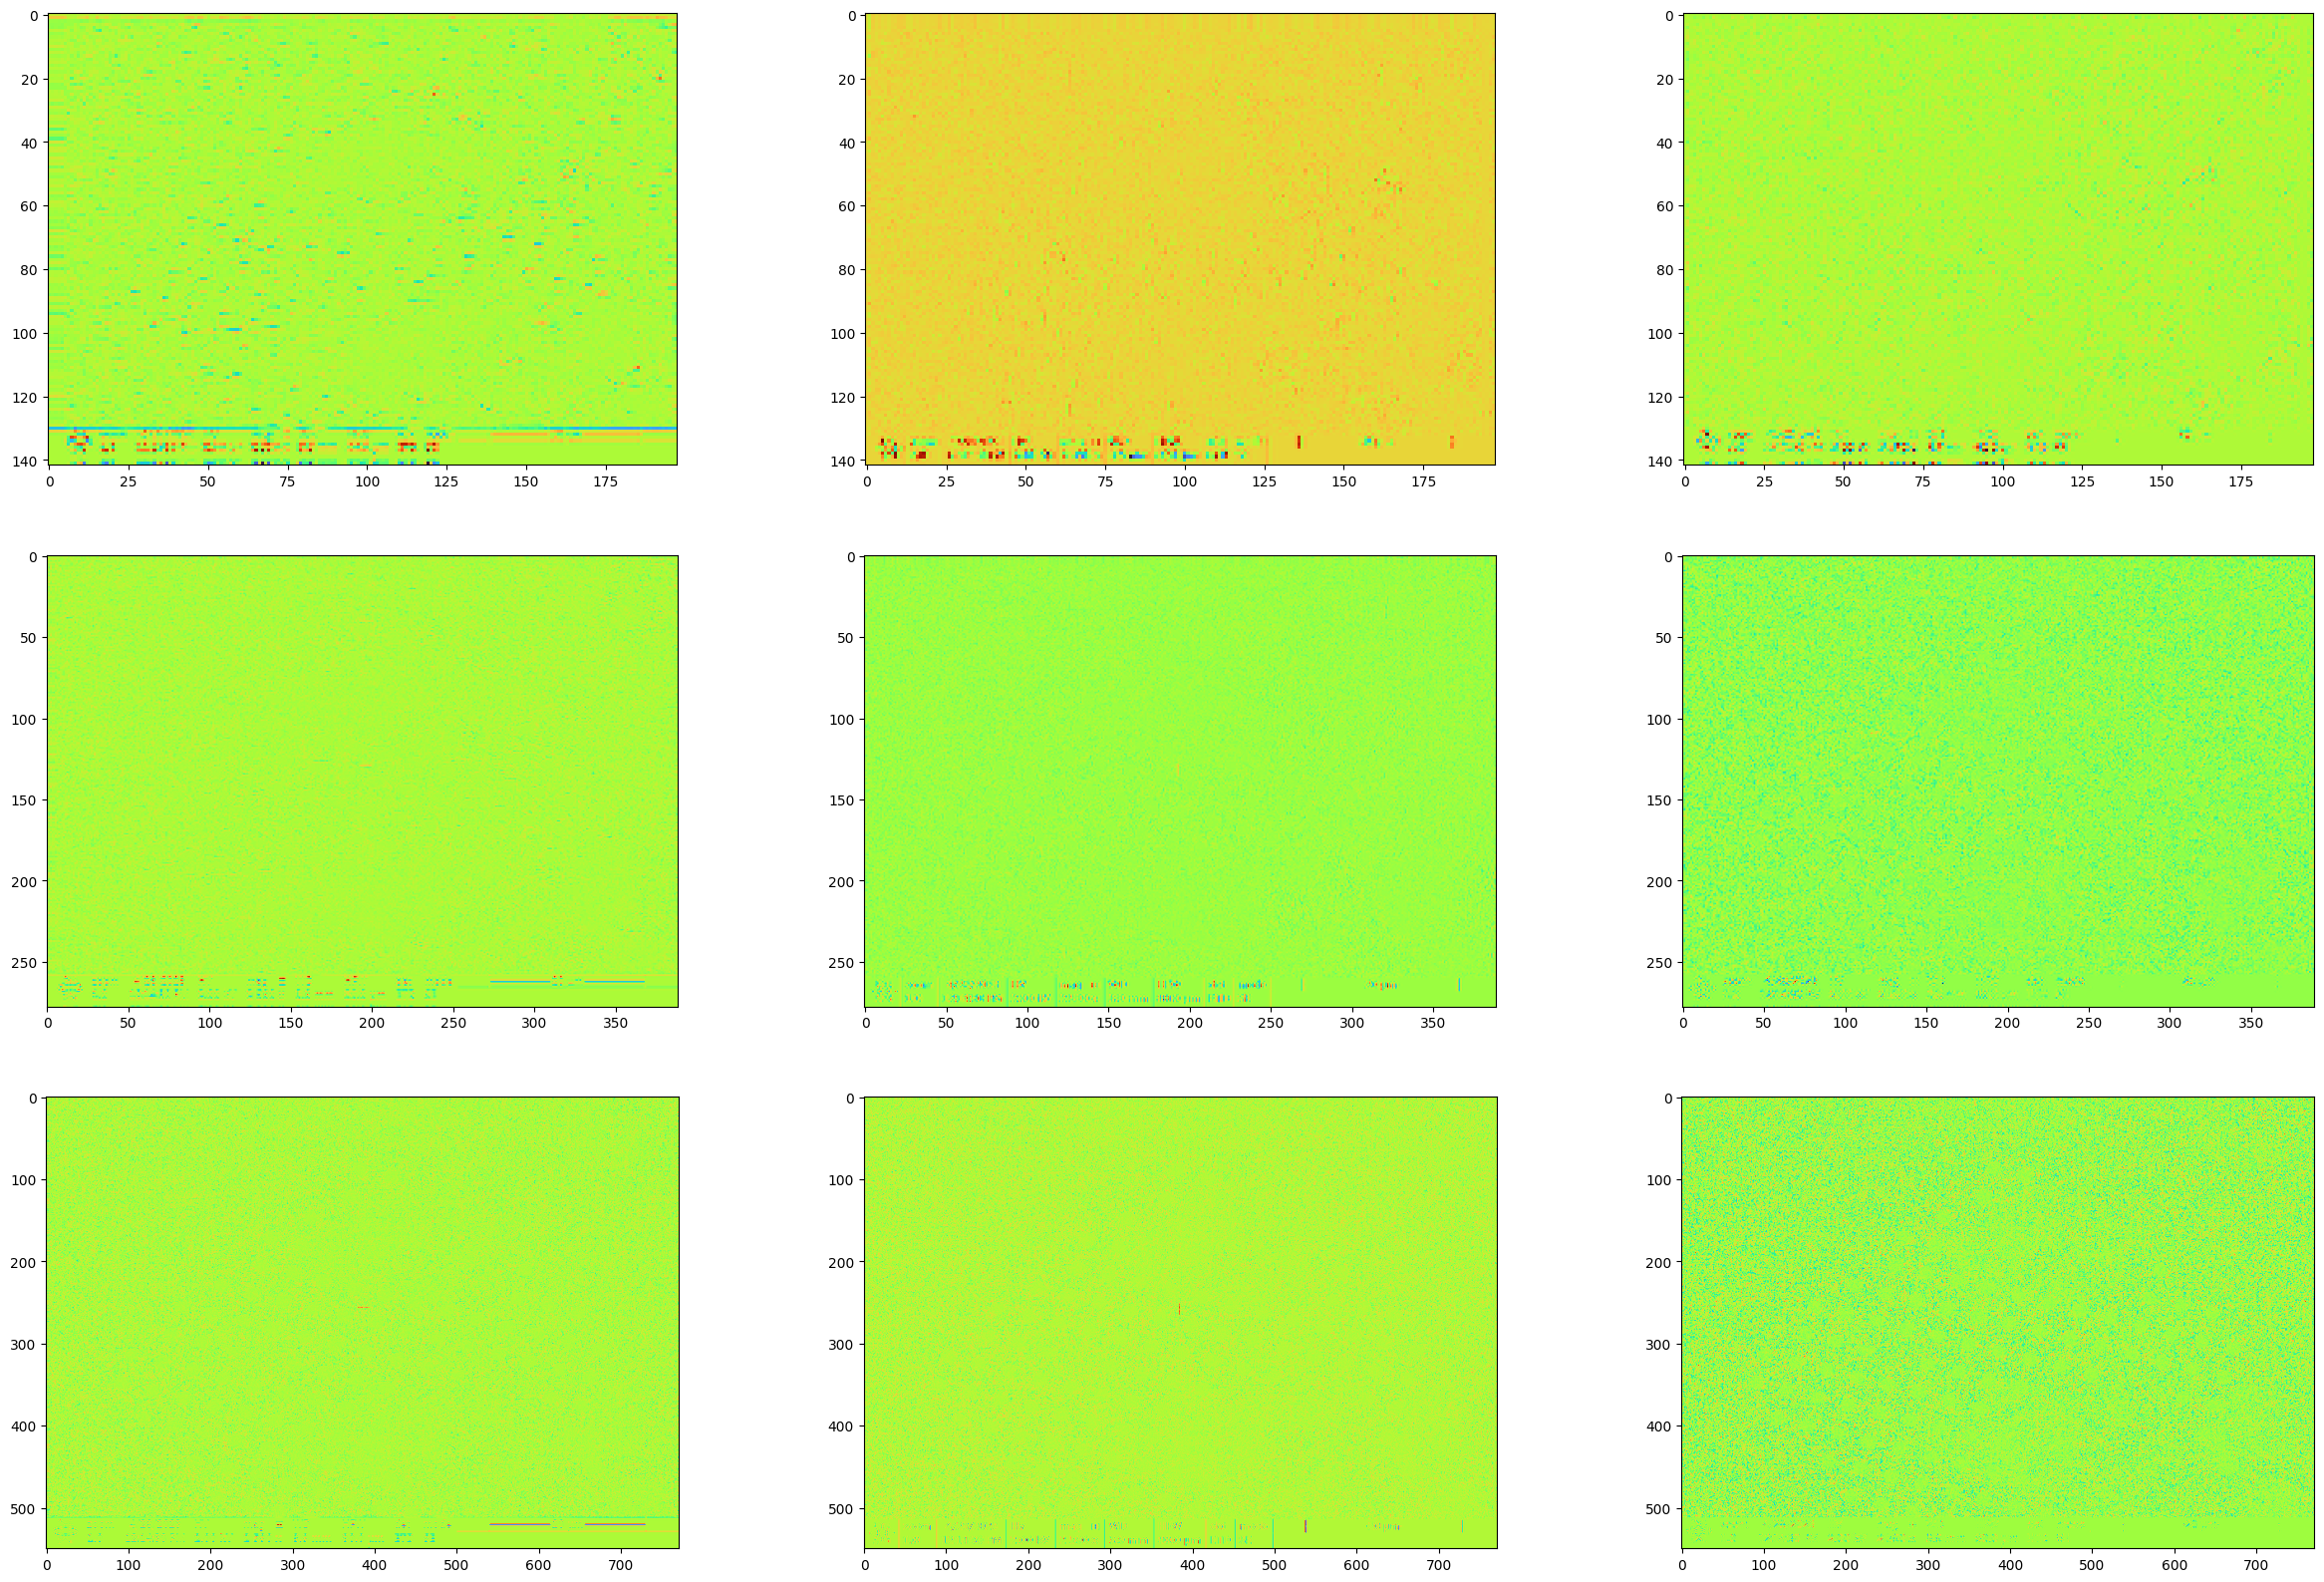

In [177]:
# Perform wavelet decomposition
wavelet = 'db4'
level = 3
coeffs1 = pywt.wavedec2(image1, wavelet, level=level)
coeffs2 = pywt.wavedec2(image2, wavelet, level=level)

# Plot the original image 1 and coeffs1[0]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image1, cmap='gray')
ax[1].imshow(coeffs1[0], cmap='gray')
plt.show()

# Plot wavelet coefficients
fig, ax = plt.subplots(3, 3, figsize=(30, 20))
ax[0, 0].imshow(coeffs1[1][0], cmap='turbo')
ax[0, 1].imshow(coeffs1[1][1], cmap='turbo')
ax[0, 2].imshow(coeffs1[1][2], cmap='turbo')
ax[1, 0].imshow(coeffs1[2][0], cmap='turbo')
ax[1, 1].imshow(coeffs1[2][1], cmap='turbo')
ax[1, 2].imshow(coeffs1[2][2], cmap='turbo')
ax[2, 0].imshow(coeffs1[3][0], cmap='turbo')
ax[2, 1].imshow(coeffs1[3][1], cmap='turbo')
ax[2, 2].imshow(coeffs1[3][2], cmap='turbo')
plt.show()
    

# do the same thing for image 2
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image2, cmap='gray')
ax[1].imshow(coeffs2[0], cmap='gray')
plt.show()

# Plot wavelet coefficients
fig, ax = plt.subplots(3, 3, figsize=(30, 20))
ax[0, 0].imshow(coeffs2[1][0], cmap='turbo')
ax[0, 1].imshow(coeffs2[1][1], cmap='turbo')
ax[0, 2].imshow(coeffs2[1][2], cmap='turbo')
ax[1, 0].imshow(coeffs2[2][0], cmap='turbo')
ax[1, 1].imshow(coeffs2[2][1], cmap='turbo')
ax[1, 2].imshow(coeffs2[2][2], cmap='turbo')
ax[2, 0].imshow(coeffs2[3][0], cmap='turbo')
ax[2, 1].imshow(coeffs2[3][1], cmap='turbo')
ax[2, 2].imshow(coeffs2[3][2], cmap='turbo')
plt.show()

# save coeffs2[1][2]
tf.imwrite(r"C:\Users\Dadie1\Downloads\pairsbeforeeb_002_wavelet.tiff", coeffs2[1][2])

 

In [139]:
)shifts = []
for i in range(level+1)[1:]:
    c1 = coeffs1[i][0]
    c2 = coeffs2[i][0]

    c3 = coeffs1[i][1]
    c4 = coeffs2[i][1]

    c5 = coeffs1[i][2]
    c6 = coeffs2[i][2]
    
    corr_1 = np.fft.ifftshift(np.abs(np.fft.ifft2(np.conj(np.fft.fft2(c1))*np.fft.fft2(c2))))
    corr_2 = np.fft.ifftshift(np.abs(np.fft.ifft2(np.conj(np.fft.fft2(c3))*np.fft.fft2(c4))))
    corr_3 = np.fft.ifftshift(np.abs(np.fft.ifft2(np.conj(np.fft.fft2(c5))*np.fft.fft2(c6))))
    corr = np.sqrt(corr_1**2 + corr_2**2 + corr_3**2)
    max_corr_idx = np.unravel_index(np.argmax(corr), corr.shape)
    shifts.append((-(max_corr_idx[0] - c1.shape[0]//2), -(max_corr_idx[1] - c1.shape[1]//2)))
    # plt.imshow(corr)
    # plt.show()
    # print(corr)

print(shifts)

# # shift 0, 0
# coeff11 = shift(coeffs1[1][0], shifts[0])



# shift the coefficients
coeffs2_aligned = [shift(coeffs2[i+1][j], shifts[i]) for i in range(3) for j in range(3)]
coeffs2_aligned.insert(0, shift(coeffs2[0], shifts[0]))

coeffs2_reshaped = [coeffs2_aligned[0], (coeffs2_aligned[1:4]), (coeffs2_aligned[4:7]), (coeffs2_aligned[7:10])]
# plt.imshow(coeffs2[0])
# plt.show()
# plt.imshow(coeffs2_reshaped[0])


print(len(coeffs2_reshaped[0]))
print(len(coeffs2_reshaped[1]))
print(len(coeffs2_reshaped[2]))
print(len(coeffs2_reshaped[3]))


# # Reconstruct aligned image
image2_aligned = pywt.waverec2(coeffs2_reshaped, wavelet)


[(-1, -2), (-3, -6), (-6, -11)]
70
3
3
3


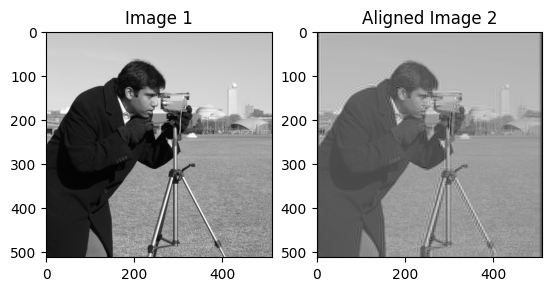

In [140]:
# Plot original and aligned images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image1, cmap='gray')
ax[0].set_title('Image 1')
ax[1].imshow(image2, cmap='gray')
ax[1].set_title('Aligned Image 2')
plt.show()

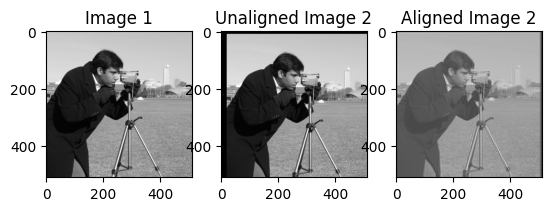

In [142]:
# Plot original and aligned images
fig, ax = plt.subplots(1, 3)
ax[0].imshow(image1, cmap='gray')
ax[0].set_title('Image 1')
ax[1].imshow(image2, cmap='gray')
ax[1].set_title('Unaligned Image 2')
ax[2].imshow(image2_aligned, cmap='gray')
ax[2].set_title('Aligned Image 2')
plt.show()

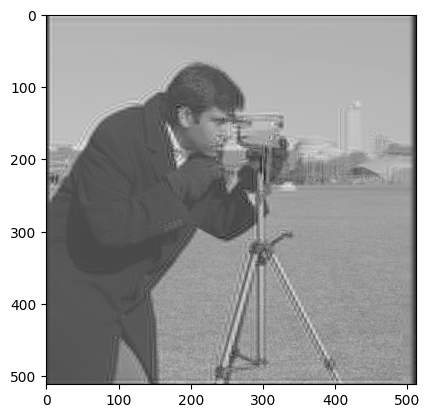

In [133]:
plt.imshow(image2_aligned, cmap='gray')a

In [125]:
for d in ds:
    print(isinstance(d, list))
    print(len(d))

True
3
True
3
True
3
